## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9663645	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9490819	total: 59.2ms	remaining: 29.5s
2:	learn: 0.9292486	total: 60.2ms	remaining: 20s
3:	learn: 0.9114789	total: 61.2ms	remaining: 15.2s
4:	learn: 0.8947213	total: 62ms	remaining: 12.3s
5:	learn: 0.8804060	total: 63ms	remaining: 10.4s
6:	learn: 0.8640959	total: 63.8ms	remaining: 9.06s
7:	learn: 0.8490900	total: 64.8ms	remaining: 8.04s
8:	learn: 0.8332225	total: 65.6ms	remaining: 7.23s
9:	learn: 0.8169164	total: 66.4ms	remaining: 6.58s
10:	learn: 0.8030156	total: 67.3ms	remaining: 6.05s
11:	learn: 0.7891375	total: 68.1ms	remaining: 5.61s
12:	learn: 0.7751619	total: 69ms	remaining: 5.24s
13:	learn: 0.7607168	total: 69.8ms	remaining: 4.92s
14:	learn: 0.7486295	total: 70.5ms	remaining: 4.63s
15:	learn: 0.7362001	total: 71.4ms	remaining: 4.39s
16:	learn: 0.7243138	total: 72.1ms	remaining: 4.17s
17:	learn: 0.7116780	total: 72.9ms	remaining: 3.98s
18:	learn: 0.6993699	total: 73.8ms	remaining: 3.81s


62:	learn: 0.4023631	total: 110ms	remaining: 1.64s
63:	learn: 0.3991127	total: 111ms	remaining: 1.63s
64:	learn: 0.3955748	total: 112ms	remaining: 1.61s
65:	learn: 0.3925651	total: 113ms	remaining: 1.6s
66:	learn: 0.3889082	total: 114ms	remaining: 1.58s
67:	learn: 0.3855580	total: 115ms	remaining: 1.57s
68:	learn: 0.3830096	total: 115ms	remaining: 1.56s
69:	learn: 0.3798441	total: 116ms	remaining: 1.54s
70:	learn: 0.3764350	total: 117ms	remaining: 1.53s
71:	learn: 0.3726904	total: 118ms	remaining: 1.52s
72:	learn: 0.3703816	total: 118ms	remaining: 1.5s
73:	learn: 0.3674977	total: 119ms	remaining: 1.49s
74:	learn: 0.3640371	total: 120ms	remaining: 1.48s
75:	learn: 0.3607363	total: 121ms	remaining: 1.47s
76:	learn: 0.3583313	total: 122ms	remaining: 1.46s
77:	learn: 0.3552148	total: 122ms	remaining: 1.45s
78:	learn: 0.3524461	total: 123ms	remaining: 1.44s
79:	learn: 0.3501669	total: 124ms	remaining: 1.43s
80:	learn: 0.3471840	total: 125ms	remaining: 1.42s
81:	learn: 0.3449178	total: 126ms

161:	learn: 0.2418780	total: 192ms	remaining: 995ms
162:	learn: 0.2412458	total: 193ms	remaining: 993ms
163:	learn: 0.2406105	total: 194ms	remaining: 990ms
164:	learn: 0.2401573	total: 195ms	remaining: 987ms
165:	learn: 0.2395951	total: 196ms	remaining: 984ms
166:	learn: 0.2388565	total: 197ms	remaining: 981ms
167:	learn: 0.2380249	total: 198ms	remaining: 978ms
168:	learn: 0.2375661	total: 198ms	remaining: 975ms
169:	learn: 0.2368749	total: 199ms	remaining: 972ms
170:	learn: 0.2362855	total: 200ms	remaining: 969ms
171:	learn: 0.2355044	total: 201ms	remaining: 966ms
172:	learn: 0.2348093	total: 201ms	remaining: 963ms
173:	learn: 0.2336623	total: 202ms	remaining: 960ms
174:	learn: 0.2331739	total: 203ms	remaining: 958ms
175:	learn: 0.2324842	total: 204ms	remaining: 955ms
176:	learn: 0.2315423	total: 205ms	remaining: 953ms
177:	learn: 0.2309437	total: 206ms	remaining: 951ms
178:	learn: 0.2304010	total: 207ms	remaining: 949ms
179:	learn: 0.2296248	total: 208ms	remaining: 946ms
180:	learn: 

289:	learn: 0.1774927	total: 301ms	remaining: 736ms
290:	learn: 0.1769453	total: 302ms	remaining: 735ms
291:	learn: 0.1765538	total: 303ms	remaining: 734ms
292:	learn: 0.1762145	total: 304ms	remaining: 732ms
293:	learn: 0.1758838	total: 304ms	remaining: 731ms
294:	learn: 0.1752557	total: 305ms	remaining: 729ms
295:	learn: 0.1747284	total: 306ms	remaining: 727ms
296:	learn: 0.1743777	total: 307ms	remaining: 726ms
297:	learn: 0.1740582	total: 308ms	remaining: 726ms
298:	learn: 0.1738672	total: 309ms	remaining: 724ms
299:	learn: 0.1733674	total: 310ms	remaining: 723ms
300:	learn: 0.1730856	total: 311ms	remaining: 721ms
301:	learn: 0.1729323	total: 311ms	remaining: 720ms
302:	learn: 0.1723302	total: 312ms	remaining: 718ms
303:	learn: 0.1719153	total: 313ms	remaining: 717ms
304:	learn: 0.1715008	total: 314ms	remaining: 715ms
305:	learn: 0.1711929	total: 315ms	remaining: 714ms
306:	learn: 0.1706104	total: 316ms	remaining: 712ms
307:	learn: 0.1703581	total: 316ms	remaining: 710ms
308:	learn: 

386:	learn: 0.1481680	total: 383ms	remaining: 607ms
387:	learn: 0.1477732	total: 384ms	remaining: 606ms
388:	learn: 0.1474430	total: 385ms	remaining: 604ms
389:	learn: 0.1470751	total: 386ms	remaining: 603ms
390:	learn: 0.1467098	total: 387ms	remaining: 602ms
391:	learn: 0.1464650	total: 387ms	remaining: 601ms
392:	learn: 0.1463496	total: 388ms	remaining: 600ms
393:	learn: 0.1458861	total: 389ms	remaining: 598ms
394:	learn: 0.1454157	total: 390ms	remaining: 597ms
395:	learn: 0.1449889	total: 391ms	remaining: 596ms
396:	learn: 0.1447372	total: 391ms	remaining: 595ms
397:	learn: 0.1445197	total: 392ms	remaining: 593ms
398:	learn: 0.1443520	total: 393ms	remaining: 592ms
399:	learn: 0.1438990	total: 394ms	remaining: 591ms
400:	learn: 0.1436560	total: 394ms	remaining: 589ms
401:	learn: 0.1432332	total: 395ms	remaining: 588ms
402:	learn: 0.1429321	total: 396ms	remaining: 587ms
403:	learn: 0.1425946	total: 397ms	remaining: 586ms
404:	learn: 0.1422197	total: 398ms	remaining: 584ms
405:	learn: 

517:	learn: 0.1152502	total: 492ms	remaining: 457ms
518:	learn: 0.1149246	total: 492ms	remaining: 456ms
519:	learn: 0.1147556	total: 493ms	remaining: 455ms
520:	learn: 0.1145075	total: 494ms	remaining: 454ms
521:	learn: 0.1143239	total: 495ms	remaining: 453ms
522:	learn: 0.1140320	total: 496ms	remaining: 452ms
523:	learn: 0.1137864	total: 497ms	remaining: 451ms
524:	learn: 0.1136002	total: 497ms	remaining: 450ms
525:	learn: 0.1133564	total: 498ms	remaining: 449ms
526:	learn: 0.1130940	total: 499ms	remaining: 448ms
527:	learn: 0.1129678	total: 500ms	remaining: 447ms
528:	learn: 0.1126847	total: 501ms	remaining: 446ms
529:	learn: 0.1126023	total: 502ms	remaining: 445ms
530:	learn: 0.1124874	total: 503ms	remaining: 444ms
531:	learn: 0.1124738	total: 503ms	remaining: 443ms
532:	learn: 0.1122497	total: 504ms	remaining: 442ms
533:	learn: 0.1119894	total: 505ms	remaining: 441ms
534:	learn: 0.1117973	total: 506ms	remaining: 440ms
535:	learn: 0.1117252	total: 507ms	remaining: 439ms
536:	learn: 

617:	learn: 0.0981224	total: 574ms	remaining: 355ms
618:	learn: 0.0979104	total: 575ms	remaining: 354ms
619:	learn: 0.0977654	total: 575ms	remaining: 353ms
620:	learn: 0.0976113	total: 576ms	remaining: 352ms
621:	learn: 0.0973750	total: 577ms	remaining: 351ms
622:	learn: 0.0971596	total: 578ms	remaining: 350ms
623:	learn: 0.0970173	total: 579ms	remaining: 349ms
624:	learn: 0.0968413	total: 580ms	remaining: 348ms
625:	learn: 0.0967457	total: 581ms	remaining: 347ms
626:	learn: 0.0965377	total: 581ms	remaining: 346ms
627:	learn: 0.0964278	total: 582ms	remaining: 345ms
628:	learn: 0.0963165	total: 583ms	remaining: 344ms
629:	learn: 0.0961871	total: 584ms	remaining: 343ms
630:	learn: 0.0961646	total: 585ms	remaining: 342ms
631:	learn: 0.0960138	total: 585ms	remaining: 341ms
632:	learn: 0.0959868	total: 586ms	remaining: 340ms
633:	learn: 0.0959381	total: 587ms	remaining: 339ms
634:	learn: 0.0957610	total: 588ms	remaining: 338ms
635:	learn: 0.0957172	total: 589ms	remaining: 337ms
636:	learn: 

744:	learn: 0.0831155	total: 682ms	remaining: 233ms
745:	learn: 0.0829567	total: 683ms	remaining: 233ms
746:	learn: 0.0828515	total: 684ms	remaining: 232ms
747:	learn: 0.0827834	total: 685ms	remaining: 231ms
748:	learn: 0.0827724	total: 685ms	remaining: 230ms
749:	learn: 0.0825737	total: 686ms	remaining: 229ms
750:	learn: 0.0824429	total: 687ms	remaining: 228ms
751:	learn: 0.0823592	total: 688ms	remaining: 227ms
752:	learn: 0.0822461	total: 689ms	remaining: 226ms
753:	learn: 0.0821405	total: 689ms	remaining: 225ms
754:	learn: 0.0820073	total: 690ms	remaining: 224ms
755:	learn: 0.0819585	total: 691ms	remaining: 223ms
756:	learn: 0.0819155	total: 692ms	remaining: 222ms
757:	learn: 0.0818022	total: 693ms	remaining: 221ms
758:	learn: 0.0816417	total: 694ms	remaining: 220ms
759:	learn: 0.0815224	total: 695ms	remaining: 219ms
760:	learn: 0.0813768	total: 695ms	remaining: 218ms
761:	learn: 0.0811380	total: 696ms	remaining: 217ms
762:	learn: 0.0809479	total: 697ms	remaining: 216ms
763:	learn: 

842:	learn: 0.0730271	total: 764ms	remaining: 142ms
843:	learn: 0.0728531	total: 765ms	remaining: 141ms
844:	learn: 0.0728139	total: 766ms	remaining: 141ms
845:	learn: 0.0727233	total: 767ms	remaining: 140ms
846:	learn: 0.0726272	total: 768ms	remaining: 139ms
847:	learn: 0.0725207	total: 769ms	remaining: 138ms
848:	learn: 0.0724571	total: 769ms	remaining: 137ms
849:	learn: 0.0723987	total: 770ms	remaining: 136ms
850:	learn: 0.0722705	total: 771ms	remaining: 135ms
851:	learn: 0.0721721	total: 772ms	remaining: 134ms
852:	learn: 0.0720555	total: 773ms	remaining: 133ms
853:	learn: 0.0719157	total: 773ms	remaining: 132ms
854:	learn: 0.0719078	total: 774ms	remaining: 131ms
855:	learn: 0.0718214	total: 775ms	remaining: 130ms
856:	learn: 0.0717303	total: 776ms	remaining: 129ms
857:	learn: 0.0716890	total: 777ms	remaining: 129ms
858:	learn: 0.0715820	total: 777ms	remaining: 128ms
859:	learn: 0.0715622	total: 778ms	remaining: 127ms
860:	learn: 0.0714449	total: 779ms	remaining: 126ms
861:	learn: 

974:	learn: 0.0611694	total: 873ms	remaining: 22.4ms
975:	learn: 0.0610888	total: 874ms	remaining: 21.5ms
976:	learn: 0.0610276	total: 875ms	remaining: 20.6ms
977:	learn: 0.0609555	total: 876ms	remaining: 19.7ms
978:	learn: 0.0607651	total: 877ms	remaining: 18.8ms
979:	learn: 0.0606858	total: 877ms	remaining: 17.9ms
980:	learn: 0.0606005	total: 878ms	remaining: 17ms
981:	learn: 0.0605638	total: 879ms	remaining: 16.1ms
982:	learn: 0.0604429	total: 880ms	remaining: 15.2ms
983:	learn: 0.0603190	total: 881ms	remaining: 14.3ms
984:	learn: 0.0602283	total: 882ms	remaining: 13.4ms
985:	learn: 0.0602158	total: 883ms	remaining: 12.5ms
986:	learn: 0.0601366	total: 884ms	remaining: 11.6ms
987:	learn: 0.0600852	total: 884ms	remaining: 10.7ms
988:	learn: 0.0599638	total: 885ms	remaining: 9.84ms
989:	learn: 0.0598876	total: 886ms	remaining: 8.95ms
990:	learn: 0.0597941	total: 887ms	remaining: 8.05ms
991:	learn: 0.0596524	total: 888ms	remaining: 7.16ms
992:	learn: 0.0596483	total: 889ms	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

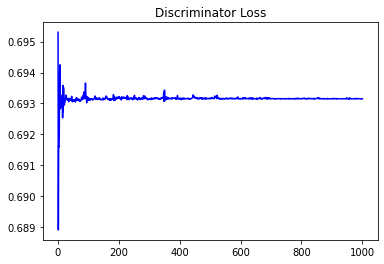

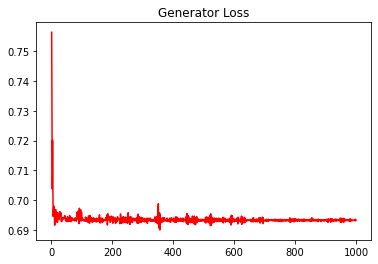

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12597136347712048


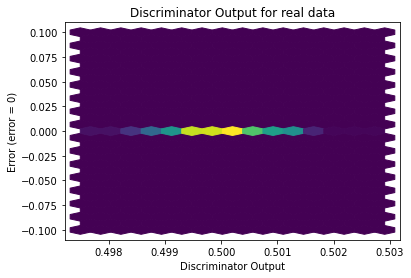

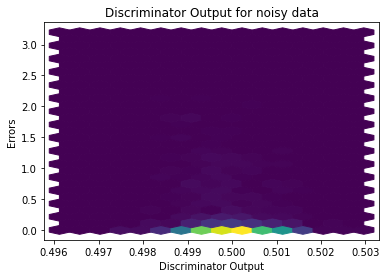

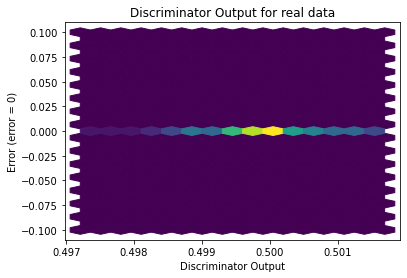

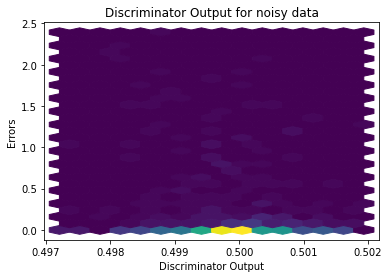

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


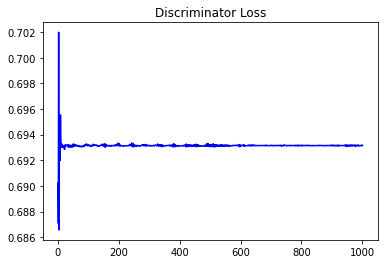

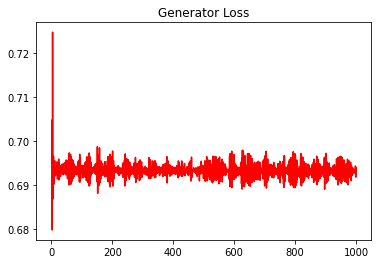

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1308010084568678


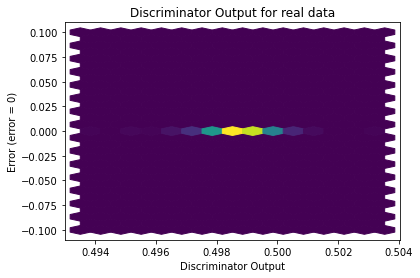

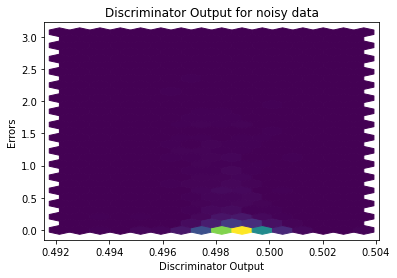

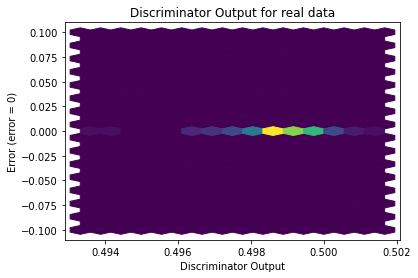

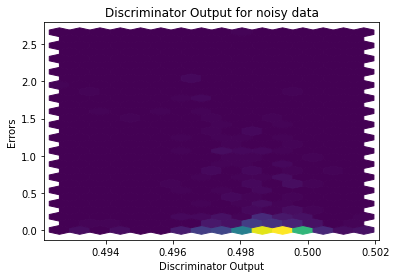

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0926]], requires_grad=True)
